In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis(EDA)

## 1.Univariate Analysis

### Histogram

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

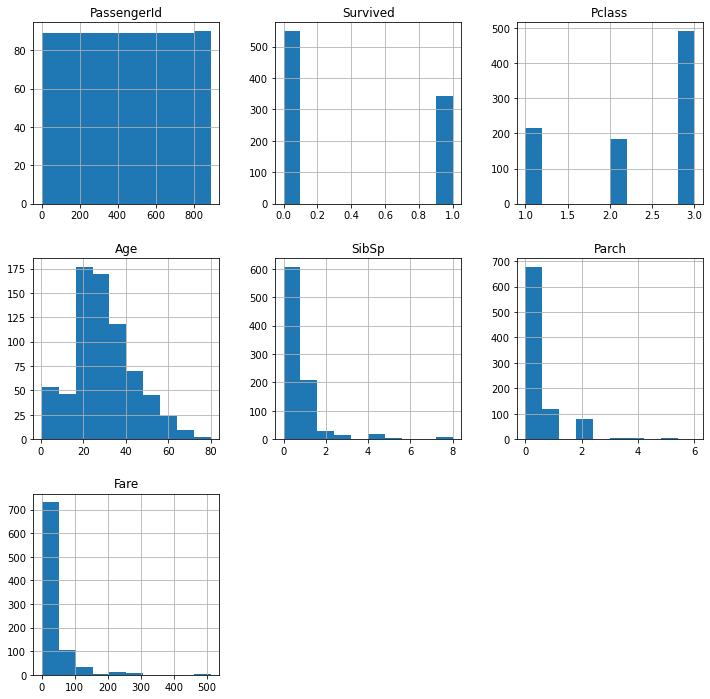

In [5]:
train.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

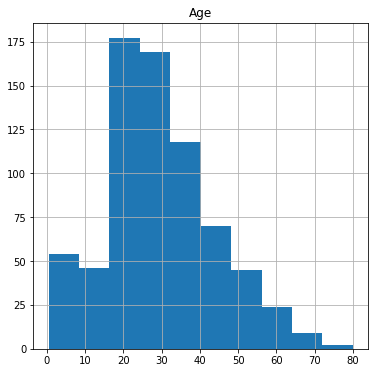

In [6]:
train.hist('Age',figsize=(6,6))

### Bar Plot

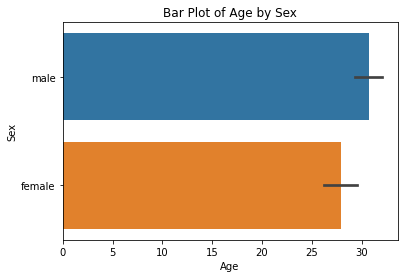

In [7]:
sns.barplot(x='Age', y='Sex', data=train)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Bar Plot of Age by Sex')

# Show the plot
plt.show()

### Box Plot

C:\Users\pramo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

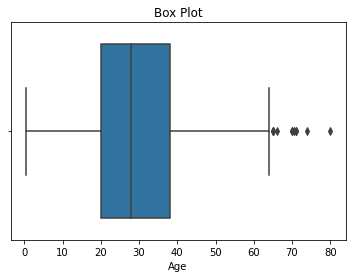

In [8]:
sns.boxplot(train['Age'])
plt.title('Box Plot')

Text(0.5, 1.0, 'Cat Plot')

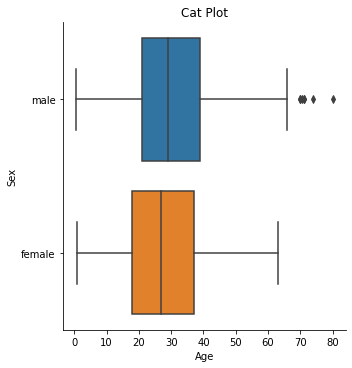

In [9]:
sns.catplot(x = 'Age', y = 'Sex', kind = 'box', data = train, dodge = False)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Cat Plot')

### Count Plot

Text(0.5, 1.0, 'Count Plot for Survival')

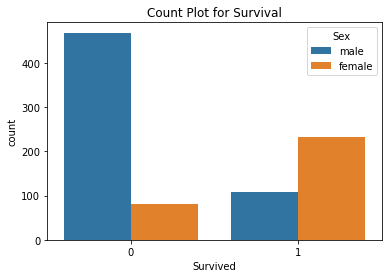

In [10]:
sns.countplot(x='Survived',data=train,palette=None,hue='Sex')
plt.title('Count Plot for Survival')

### Pie Chart

3    491
1    216
2    184
Name: Pclass, dtype: int64


Text(0.5, 1.0, 'Pie Chart by Pclass')

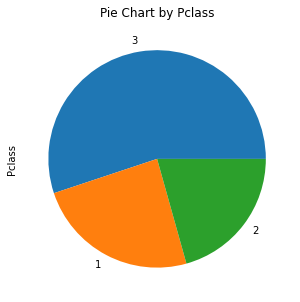

In [11]:
plt.figure(figsize=(5,5))
train.Pclass.value_counts().plot(kind='pie')
print (train.Pclass.value_counts())
plt.title('Pie Chart by Pclass')

### Kernel Density Estimation (KDE) Plot

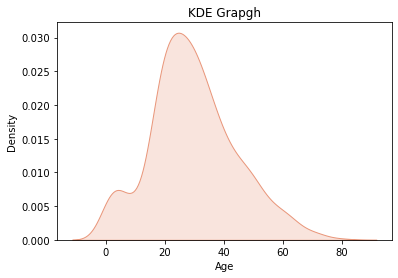

In [12]:
sns.kdeplot(data= train["Age"] ,color = "darksalmon",shade=True)
plt.title('KDE Grapgh')
plt.show()

## Bivariate and Multivariate

### Heat Map

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

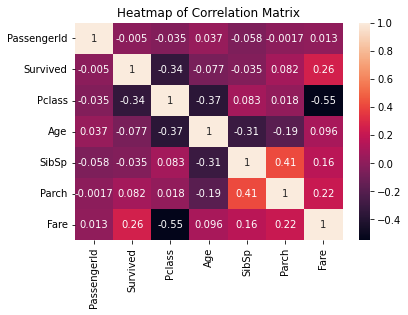

In [13]:
# Create correlation matrix
corr = train.corr()

# Plot heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

# Add title
plt.title('Heatmap of Correlation Matrix')

### Scatter Plot

Text(0.5, 1.0, 'Scatter Plot')

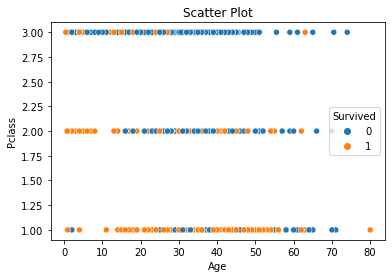

In [14]:
sns.scatterplot(x='Age',y='Pclass',data=train,hue='Survived')
plt.title('Scatter Plot')

### Pair Plot

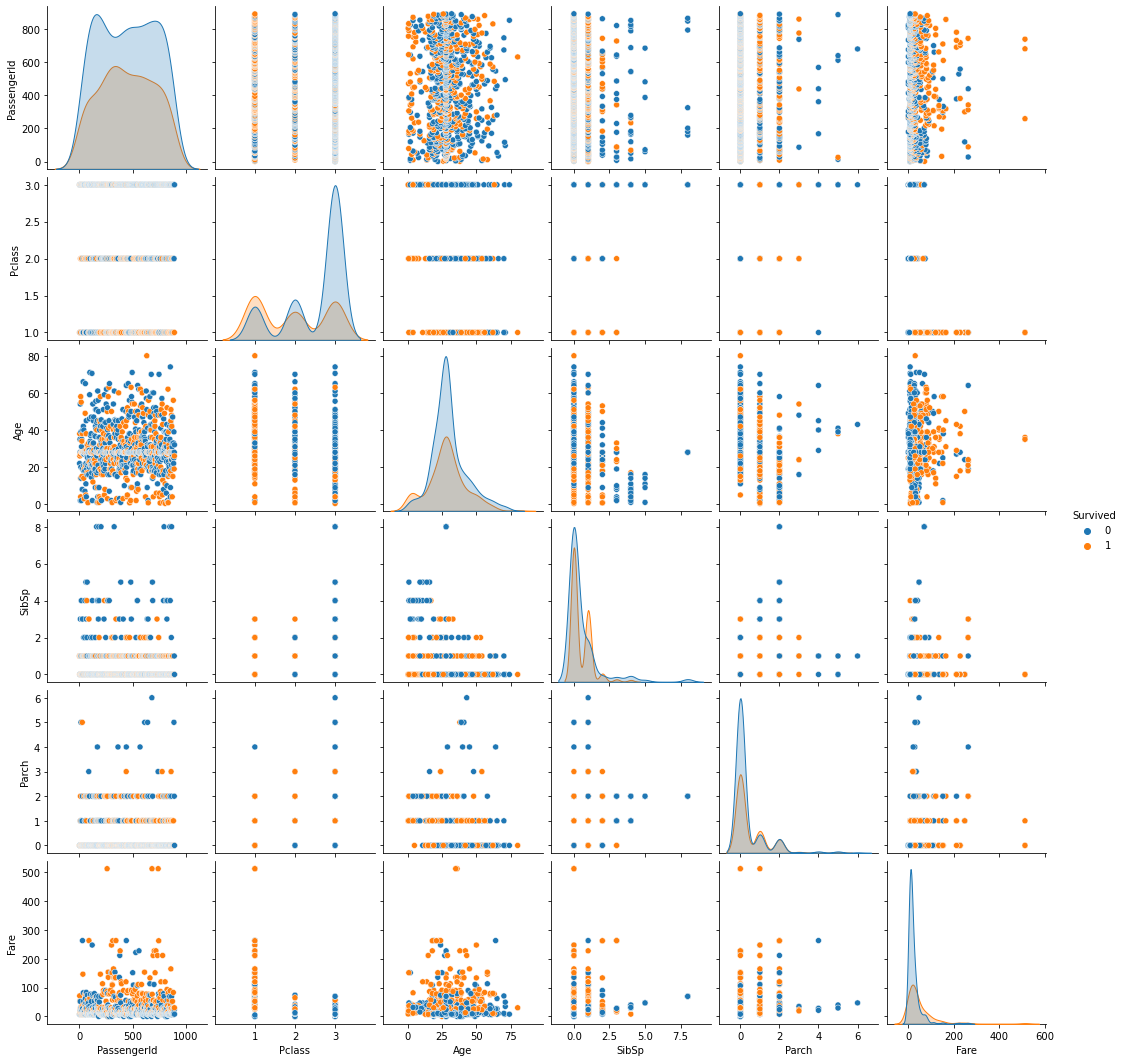

In [57]:
sns.pairplot(train,hue='Survived')

# 2 Data preprocessing
Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

## Data Cleaning

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
#Checking data that have null values in it 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic=train.sort_values(by='Name')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [20]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
titanic.shape

(891, 12)

In [22]:
#Droping columns which have no values in titanic data set
titanic.dropna(how='any',inplace=True)

In [23]:
titanic.shape

(183, 12)

## Filling the value in place of null value in the data set

In [24]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Age Column is having 177 NAN values .**
- **Cabin Column is having 687 NAN values .**
- **Embarked Column is having 2 NAN values .**

#### Age:
- As we  cab clearly see , the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.
- But the problem is, there were many people with many different ages. We just cant assign a 4 year kid  or 80 years old man     with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

In [25]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

test["Fare"].fillna(test['Fare'].median(), inplace=True)

train["Embarked"].fillna("S", inplace = True) 

In [36]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
train.drop('Cabin', axis = 1, inplace=True)

In [38]:
train.dropna(inplace=True)

In [39]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Creating new Features

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head()

,male
730,0
305,1
297,0
498,0
460,1


In [42]:
embark = pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
730,0,0,1
305,0,0,1
297,0,0,1
498,0,0,1
460,0,0,1


In [43]:
sibsp = pd.get_dummies(titanic['SibSp'], prefix='SibSp')
sibsp.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3
730,1,0,0,0
305,0,1,0,0
297,0,1,0,0
498,0,1,0,0
460,1,0,0,0


In [44]:
parch = pd.get_dummies(titanic['Parch'], prefix='Parch')
parch.head()

,Parch_0,Parch_1,Parch_2,Parch_4
730,1,0,0,0
305,0,0,1,0
297,0,0,1,0
498,0,0,1,0
460,1,0,0,0


### Combine all the features

In [46]:
titanic = titanic.drop(['PassengerId', 'Name','Sex', 'SibSp', 'Parch', 
                        'Ticket', 'Embarked'], axis = 1)

titanic.head()

,Survived,Pclass,Age,Fare
730,1,1,29.00,211.3375
305,1,1,0.92,151.5500
297,0,1,2.00,151.5500
498,0,1,25.00,151.5500
460,1,1,48.00,26.5500


In [47]:
titanic = pd.concat([titanic, sex, embark, sibsp, parch], axis = 1)

titanic.head()

,Survived,Pclass,Age,Fare,male,C,Q,S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,Parch_0,Parch_1,Parch_2,Parch_4
730,1,1,29.00,211.3375,0,0,0,1,1,0,0,0,1,0,0,0
305,1,1,0.92,151.5500,1,0,0,1,0,1,0,0,0,0,1,0
297,0,1,2.00,151.5500,0,0,0,1,0,1,0,0,0,0,1,0
498,0,1,25.00,151.5500,0,0,0,1,0,1,0,0,0,0,1,0
460,1,1,48.00,26.5500,1,0,0,1,1,0,0,0,1,0,0,0


In [48]:
titanic.shape

(183, 16)

# Create a Model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [50]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3,
                                               random_state = 100)

In [52]:
model = LogisticRegression()

model.fit(xtrain, ytrain) # y = m1x1 + m2x2 + c

C:\Users\pramo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predictions = model.predict(xtest)

In [54]:
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

# Evaluation

In [55]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59        21
           1       0.74      0.85      0.79        34

    accuracy                           0.73        55
   macro avg       0.72      0.69      0.69        55
weighted avg       0.72      0.73      0.72        55

